In [1]:
import numpy as np
import pandas as pd
import glob
from os.path import splitext, basename
from scipy.stats import linregress
from operator import itemgetter

import matplotlib.pyplot as plt

# Purpose

The figure shows the increase of followers compared to the company/industry size (extrapolated by the sum of all the employees on LinkedIn) over time

In [2]:
df = pd.read_csv('../data/section_3/temp_datalab_records_linkedin_company.csv')
df['as_of_date'] = pd.to_datetime(df.as_of_date)
df = df.dropna(subset=['industry'])

/anaconda3/envs/tdi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def replace_and(x):
    """
    if & or &amp; in value, replace it with /
    """
    replace_list = ['&amp;','/amp;','&']
    for i in replace_list:
        if i in x:
            y = x.replace(i, '/')
            break
        else:
            y = x
    return y

In [5]:
df['industry'] = df.industry.apply(lambda x: replace_and(x))

# Testing on one industry

Increase of followers for companies in Investment Banking industry

# Increase of followers for all industries

In [6]:
df = df[df.employees_on_platform!=0]
df['followers_to_size'] = df.followers_count/df.employees_on_platform

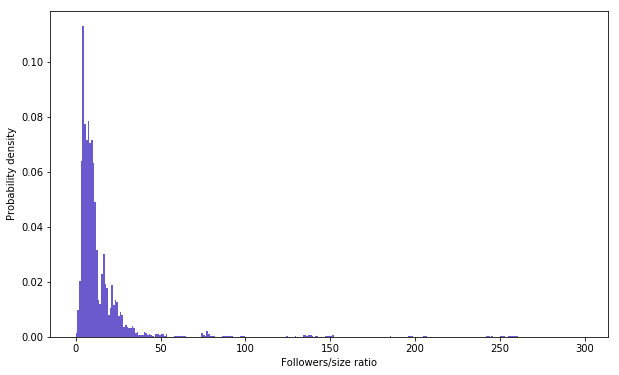

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
followers_to_size = []
for industry, data in df.groupby('industry'):
    industry_sum = data.groupby('as_of_date')[['followers_count', 'employees_on_platform']].sum()
    y = (industry_sum.followers_count/industry_sum.employees_on_platform).tolist()
    followers_to_size.extend(y)
ax.hist(followers_to_size, color='slateblue', density=True, bins=np.arange(0, 300, 1)) 
ax.set_ylabel('Probability density')
ax.set_xlabel('Followers/size ratio')
plt.savefig('../result/followers_to_size_ratio.png', dpi=300, transparent=True, bbox_inches='tight')

### Clustered around 0-100 

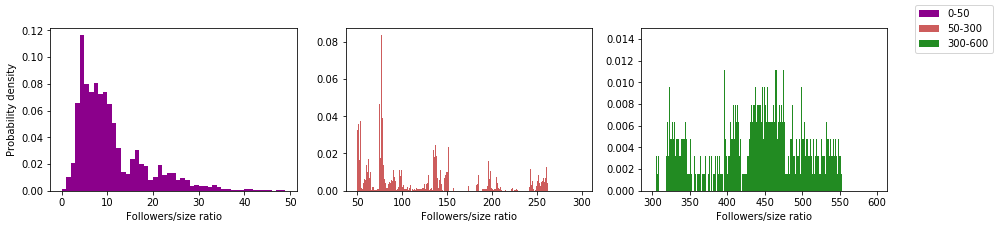

In [62]:
fig, ((ax1, ax2, ax3)) = plt.subplots(figsize=(15,3), nrows=1, ncols=3)
c1 = 'darkmagenta'
ax1.hist(followers_to_size, color=c1, density=True, bins=np.arange(0, 50, 1), label='0-50') 
ax1.set_ylabel('Probability density')
ax1.set_xlabel('Followers/size ratio')
c2 = 'indianred'
ax2.hist(followers_to_size, color=c2, density=True, bins=np.arange(50, 300, 1), label='50-300') 
ax2.set_xlabel('Followers/size ratio')
c3 = 'forestgreen'
ax3.hist(followers_to_size, color=c3, density=True, bins=np.arange(300, 600, 1), label='300-600') 
ax3.set_xlabel('Followers/size ratio')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()


fig.legend(h1+h2+h3, l1+l2+l3, loc='upper right')
plt.savefig('../result/followers_to_size_ratio_group.png', dpi=300, transparent=True, bbox_inches='tight')

### Clustered from 50-300

### Clusters from 300-600

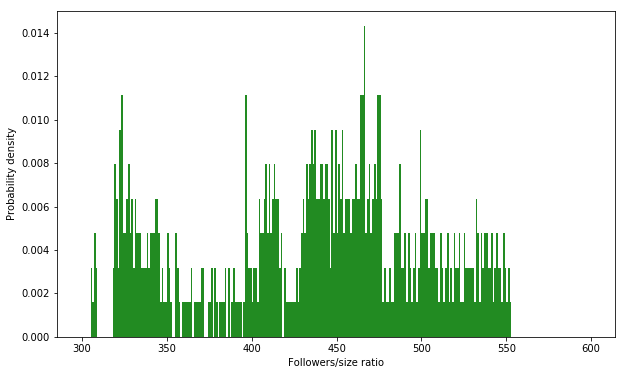

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

plt.savefig('../result/followers_to_size_ratio_magnified_300_600.png', dpi=300, transparent=True, bbox_inches='tight')

# Conclusion

Company's prominence (a.k.a followers to size) on linkedin can be divided into 3 groups. 